# Chapter 10, demo 1

Bayesian data analysis

Rejection sampling example

In rejection sampling the proposal distribution $g(\theta)$ has to form an envelope over the target distribution $q(\theta)$, that is, there has to be value $M$ so that

$$
  \frac{q(\theta)}{M g(\theta)} \leq 1.
$$


In [1]:
import numpy as np
from scipy.stats import gaussian_kde
import preliz as pz

import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
pz.style.use('preliz-doc')

In [2]:
# fake interesting distribution
x = np.linspace(-3, 3, 200)
r = np.array([ 1.1 ,  1.3 , -0.1 , -0.7 ,  0.2 , -0.4 ,  0.06, -1.7 ,
               1.7 ,  0.3 ,  0.7 ,  1.6 , -2.06, -0.74,  0.2 ,  0.5 ])
# Estimate the density (named q, to emphasize that it does not need to be
# normalized). Parameter bw_method=0.48 is used to mimic the outcome of the
# kernelp function in Matlab.
q = gaussian_kde(r, bw_method=0.48).evaluate(x)

In [3]:
# rejection sampling example
g_mean = 0
g_std = 1.1
g = pz.Normal(g_mean, g_std).pdf(x)
# M is computed by discrete approximation
M = np.max(q/g)
# prescale
g *= M

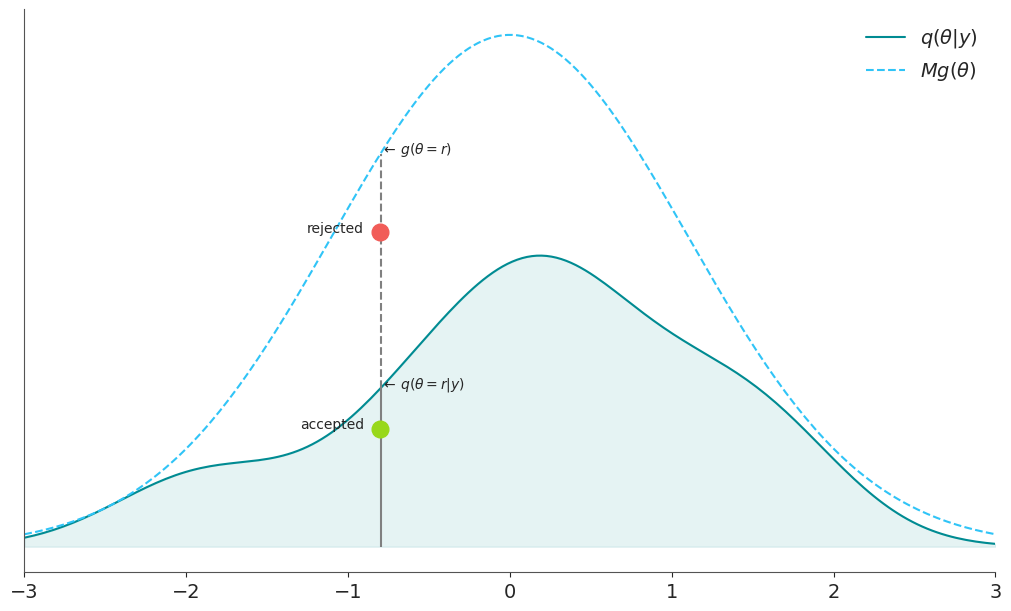

In [4]:
# Create figure and axes
_, ax = plt.subplots(figsize=(10, 6))

# Plot densities
ax.plot(x, q, label=r'$q(\theta|y)$')
ax.plot(x, g, 'C3--', label=r'$Mg(\theta)$')
ax.fill_between(x, q, color='C0', alpha=0.1)
ax.set(xlim=(x[[0, -1]]), yticks=[])
ax.legend()

# Illustrate one sample
r1 = -0.8
zi = np.argmin(np.abs(x - r1))  # closest grid point

# Vertical lines
ax.vlines(x[zi], 0, q[zi], color='gray')
ax.vlines(x[zi], q[zi], g[zi], color='gray', linestyles='--')

# Mark points
r21, r22 = 0.3 * g[zi], 0.8 * g[zi]
ax.plot(r1, r21, 'o', color="C1", markersize=12)
ax.plot(r1, r22, 'o', color="C2", markersize=12)

# Annotations
ax.text(x[zi], q[zi], r'$\leftarrow \, q(\theta=r|y)$')
ax.text(x[zi], g[zi], r'$\leftarrow \, g(\theta=r)$')
ax.text(r1 - 0.1, r21, 'accepted', ha='right')
ax.text(r1 - 0.1, r22, 'rejected', ha='right')

plt.show()


In [5]:
# get nsamp samples
nsamp = 200
r1 = pz.Normal(g_mean, g_std).rvs(size=nsamp)
zi = np.argmin(np.abs(x[:,None] - r1), axis=0)
r2 = np.random.rand(nsamp) * g[zi]
acc = r2 < q[zi]

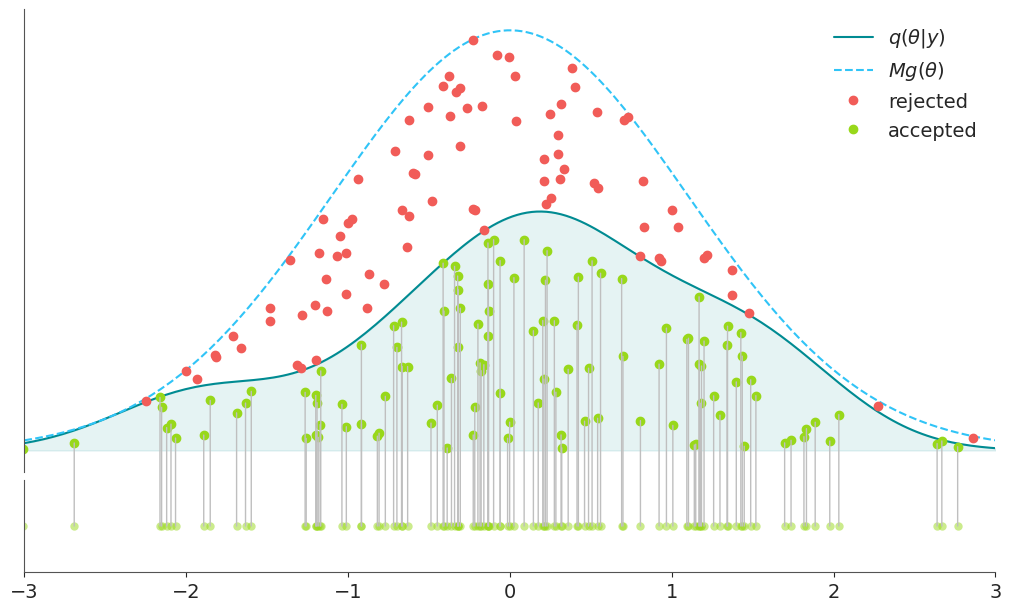

In [6]:
# Plot the densities
fig, (ax_top, ax_bottom) = plt.subplots(2, 1, figsize=(10, 6), sharex=True, gridspec_kw={'height_ratios': [5, 1]})

# Densities and samples
ax_top.plot(x, q, label=r'$q(\theta|y)$')
ax_top.plot(x, g, 'C3--', label=r'$Mg(\theta)$')
ax_top.set(xlim=(x[[0, -1]]), yticks=[])
ax_top.fill_between(x, q, color='C0', alpha=0.1)

# remove bottom xticks and spines
ax_top.spines['bottom'].set_visible(False)
ax_top.tick_params(axis='x', which='both', bottom=False)

# Plot rejected and accepted samples
ax_top.plot(r1[~acc], r2[~acc], 'C2o', label='rejected')
ax_top.plot(r1[acc], r2[acc], 'C1o', label='accepted')
ax_top.legend()

# Only accepted samples
ax_bottom.plot(r1[acc], np.ones(acc.sum()), 'C1o', alpha=0.5, mec="none")
ax_bottom.set(yticks=[], xlim=(x[[0, -1]]))


# Add inter-axis lines
for sample_idx in range(nsamp):
    if acc[sample_idx] and x[0] <= r1[sample_idx] <= x[-1]:
        x_pos = r1[sample_idx]
        
        fig.add_artist(ConnectionPatch(
            xyA=(x_pos, 1),
            xyB=(x_pos, r2[sample_idx]),
            coordsA=ax_bottom.transData,
            coordsB=ax_top.transData,
            axesA=ax_bottom,
            axesB=ax_top,
            color='0.75',
        ))

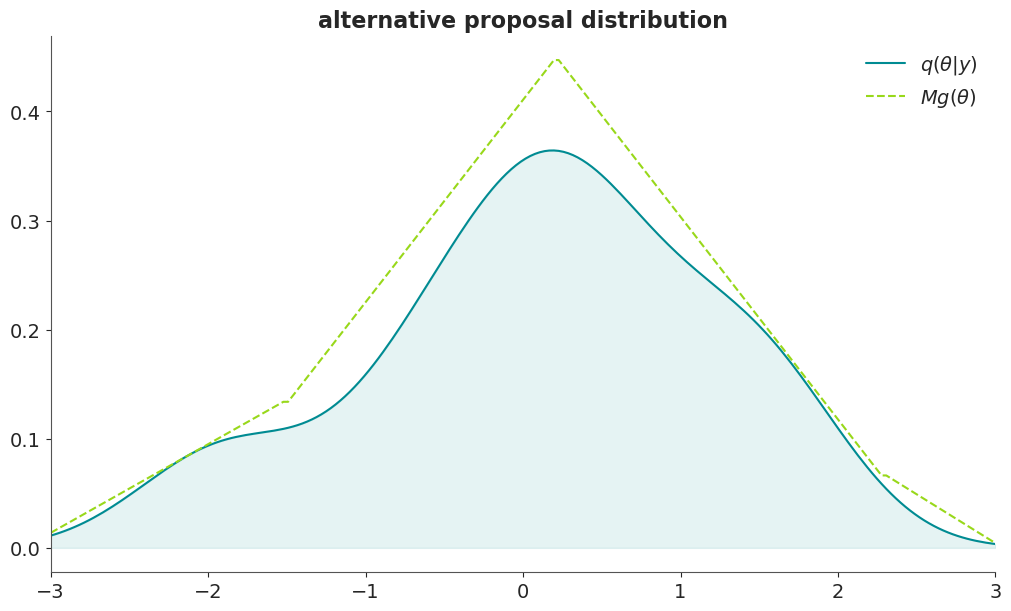

In [7]:
# alternative proposal distribution
g = np.empty(x.shape)
g[x <= -1.5] = np.linspace(q[0], np.max(q[x<=-1.5]), len(x[x<=-1.5]))
g[(x > -1.5) & (x <= 0.2)] = np.linspace(
    np.max(q[x<=-1.5]),
    np.max(q[(x>-1.5) & (x<=0.2)]),
    len(x[(x>-1.5) & (x<=0.2)])
)
g[(x > 0.2) & (x <= 2.3)] = np.linspace(
    np.max(q[(x>-1.5) & (x<=0.2)]),
    np.max(q[x>2.3]),
    len(x[(x>0.2) & (x<=2.3)])
)
g[x > 2.3] = np.linspace(np.max(q[x>2.3]), q[-1], len(x[x>2.3]))
M = np.max(q/g)
g *= M

# plot
plt.figure(figsize=(10, 6))
plt.plot(x, q)
plt.plot(x, g, linestyle='--')
plt.fill_between(x, q, color='C0', alpha=0.1)
plt.legend((r'$q(\theta|y)$', r'$Mg(\theta)$'))
plt.xlim([x[0], x[-1]])
plt.title('alternative proposal distribution');